In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
raw_data=pd.read_csv("Countries.csv")

In [4]:
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


# plotting the data

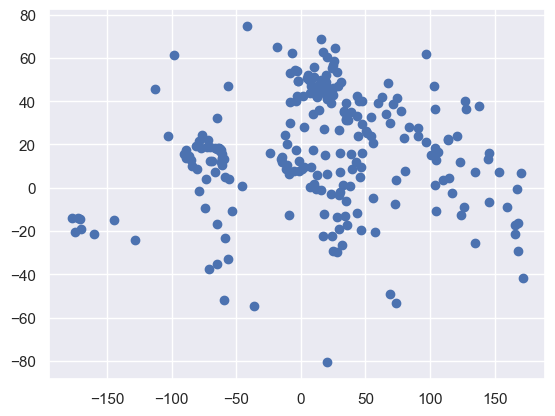

In [5]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])

# selecting the features (only taking the long and latitu columns)

In [6]:
cluster_data=raw_data.iloc[:,[1,2]] #: - gets all rows # [1,2] takes the 2nd and 3rd column

In [7]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


# standarize the variables

In [8]:
ss = StandardScaler()
cluster_data= pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

# Clustering

In [18]:
kmeans = KMeans(4) #data gets divided into 4 clusters

In [19]:
kmeans.fit(cluster_data)

C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [21]:
identified_clusters = kmeans.fit_predict(cluster_data)

C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
identified_clusters

array([2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 3, 0, 2, 3, 1, 1, 0, 1, 0, 0,
       3, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 3, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 0, 1, 3, 0, 1, 1, 3, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2,
       3, 2, 3, 0, 2, 1, 2, 1, 3, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 1, 0, 1, 3, 2, 2, 3, 1, 1, 3, 1, 0, 1, 2, 1, 3, 0, 1, 1, 1,
       3, 2, 1, 1, 1, 0, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 0, 1, 2, 0, 0, 3,
       0, 3, 1, 3, 0, 2, 2, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2,
       3, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 3, 0, 0, 3, 0, 2, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 3, 1, 1, 3, 2, 2, 1,
       1, 3, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 0, 0, 0])

# clustering results

In [22]:
new_data = raw_data.copy()

In [24]:
new_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [25]:
new_data['clusterNo'] = identified_clusters #new column

In [26]:
new_data.head()

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,0


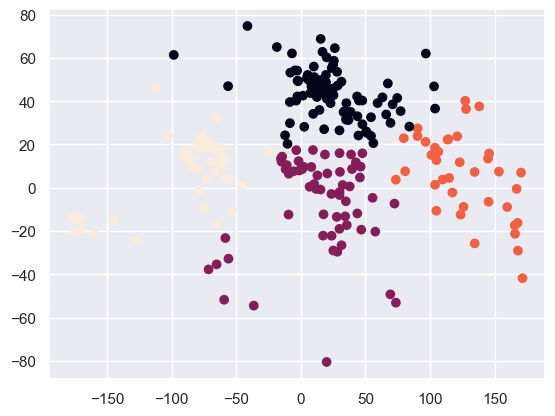

In [27]:
plt.scatter(new_data['Longitude'], new_data['Latitude'], c=new_data['clusterNo']) #coloured scatter plot

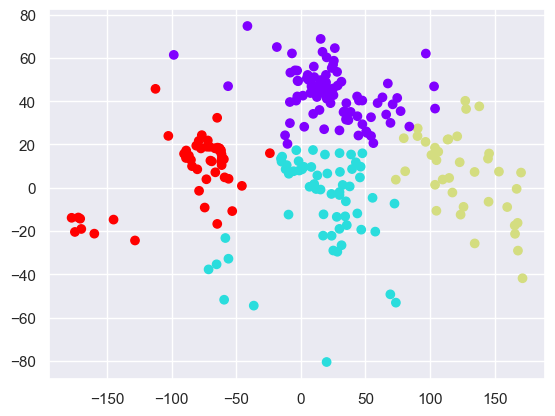

In [28]:
plt.scatter(new_data['Longitude'], new_data['Latitude'], c=new_data['clusterNo'], cmap='rainbow') #coloured scatter plot

# obtaining the optimal number of clusters

In [29]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)

C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sameer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

Text(0, 0.5, 'Within-cluster Sum of Squares')

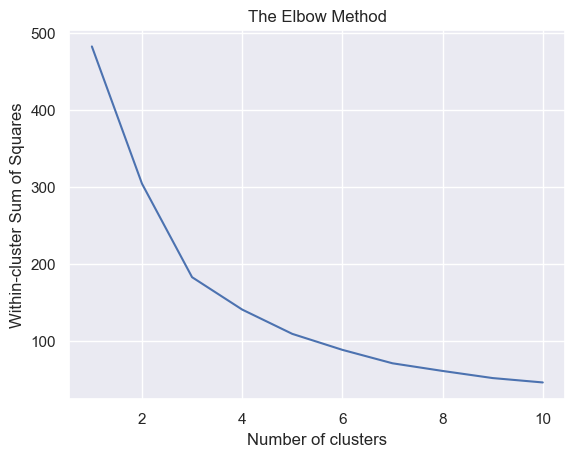

In [30]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')